# Plotting examples with different Python packages
### Sarah Stueve
####  UA Software Carpentry - March 2025
---

Imports:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_line, labs

## Read in data

In [27]:
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

# Extract year from last 4 characters of each column name
# The current column names are structured as 'gdpPercap_(year)', 
# so we want to keep the (year) part only for clarity when plotting GDP vs. years
# To do this we use replace(), which removes from the string the characters stated in the argument
# This method works on strings, so we use replace() from Pandas Series.str vectorized string functions

years = data.columns.str.replace('gdpPercap_', '')

# Convert year values to integers, saving results back to dataframe

data.columns = years.astype(int)

## `matplotlib`

<Axes: >

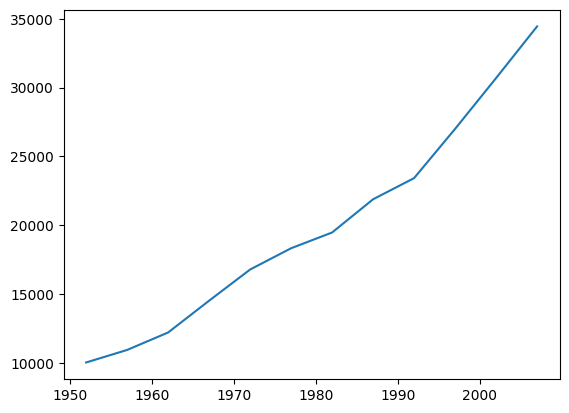

In [20]:
# default plotting uses matplotlib
data.loc['Australia'].plot()

Text(0, 0.5, 'GDP per capita')

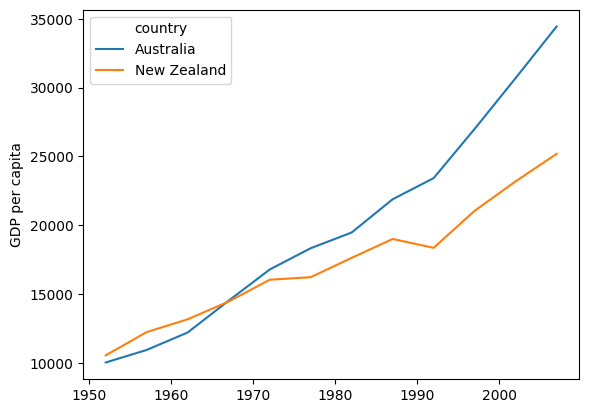

In [21]:
data.T.plot()
plt.ylabel('GDP per capita')

## `seaborn`

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: >

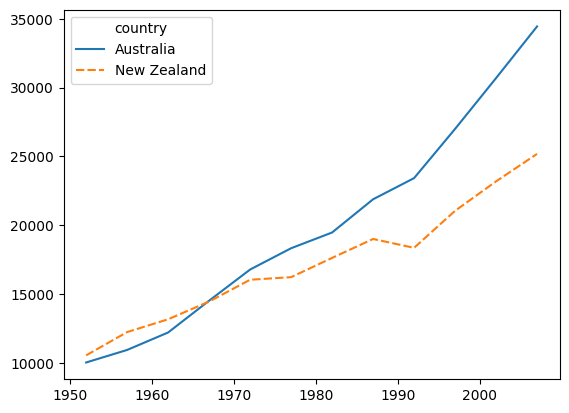

In [22]:
sns.lineplot(data = data.T)

## `plotnine` (aka `ggplot`)

In [23]:
# Updated example - data in long format
data_long = pd.read_csv('data/gapminder_gdp_oceania.csv')

# Extract year from last 4 characters of each column name
# The current column names are structured as 'gdpPercap_(year)', 
# so we want to keep the (year) part only for clarity when plotting GDP vs. years
# To do this we use replace(), which removes from the string the characters stated in the argument
# This method works on strings, so we use replace() from Pandas Series.str vectorized string functions

data_long = data_long.melt(id_vars = 'country',
            var_name = 'year',
            value_name = 'gdp_per_cap')

data_long['year'] = data_long.year.str.replace('gdpPercap_', '').astype(int)

# Convert year values to integers, saving results back to dataframe

# data.columns = years[0] + years[1:].astype(int)
data_long.head()

,country,year,gdp_per_cap
0,Australia,1952,10039.59564
1,New Zealand,1952,10556.57566
2,Australia,1957,10949.64959
3,New Zealand,1957,12247.39532
4,Australia,1962,12217.22686


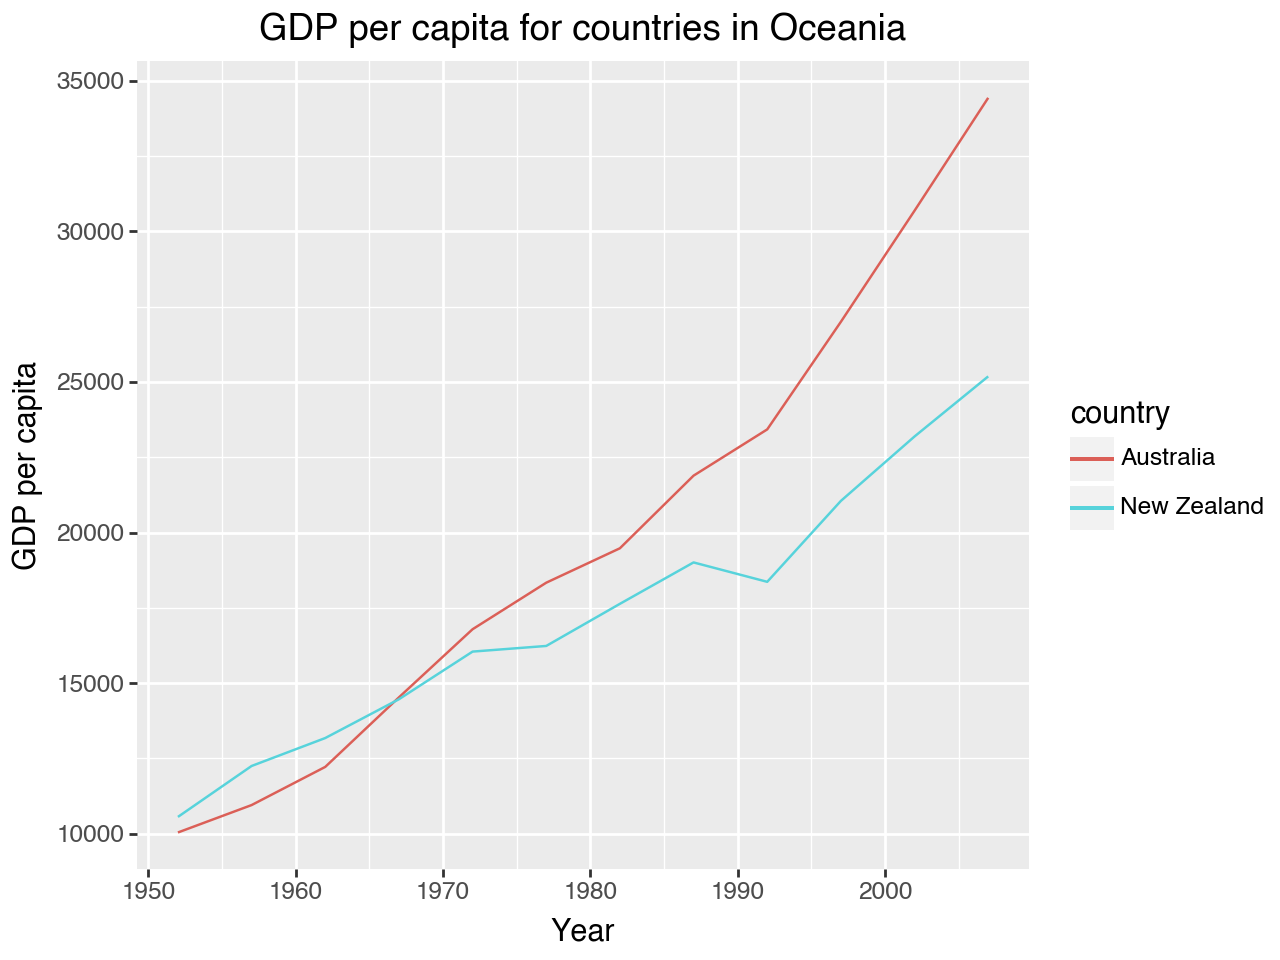

In [26]:
plot = (
    ggplot(data_long, aes(x = 'year', y = 'gdp_per_cap', color = 'country'))
    + geom_line()
    + labs(x = 'Year', y = 'GDP per capita', title = 'GDP per capita for countries in Oceania')
)
plot.show()